<a href="https://colab.research.google.com/github/yasshf/MicroService/blob/main/yassin_hfaiedh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✅**Course Completion Prediction Notebook**

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/online_course_engagement_data.csv")
df.head()


,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


# ✅**Exploratory Data Analysis (EDA):**

In [3]:
# Shape of the dataset
print("Shape of dataset:", df.shape)

# Data types and non-null values
df.info()

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

Shape of dataset: (9000, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB

Missing values:
 UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType             

In [4]:
df.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,4498.894556,50.163822,10.024667,5.090556,74.706028,50.340146,0.500667,0.396444
std,2596.849433,28.491750,6.029878,3.157762,14.378383,28.950977,0.500027,0.489186
min,1.000000,1.005230,0.000000,0.000000,50.005119,0.009327,0.000000,0.000000
25%,2251.750000,25.440548,5.000000,2.000000,62.283451,25.653614,0.000000,0.000000
50%,4483.500000,49.818417,10.000000,5.000000,74.743294,50.264124,1.000000,0.000000
75%,6751.250000,75.069924,15.000000,8.000000,87.022663,75.572493,1.000000,1.000000
max,9000.000000,99.992558,20.000000,10.000000,99.994984,99.979711,1.000000,1.000000


***Class Distribution (Target Variable)***

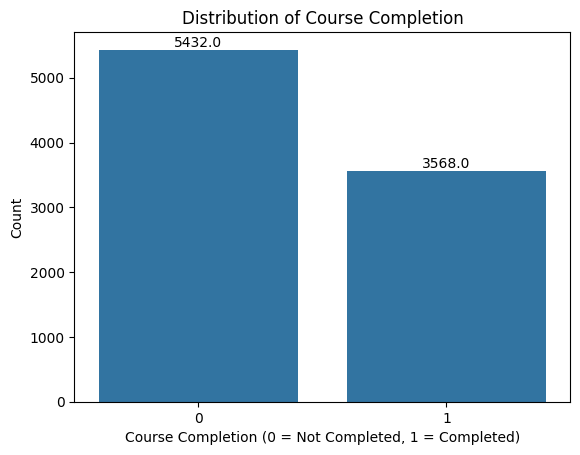


Class distribution (percent):
CourseCompletion
0   60.36%
1   39.64%


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class balance with value annotations
ax = sns.countplot(x='CourseCompletion', data=df)
plt.title("Distribution of Course Completion")
plt.xlabel("Course Completion (0 = Not Completed, 1 = Completed)")
plt.ylabel("Count")

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Percentage of each class with better formatting
completion_percent = df['CourseCompletion'].value_counts(normalize=True) * 100
print("\nClass distribution (percent):")
print(completion_percent.to_string(float_format="%.2f%%"))

In [6]:
# Unique categories in CourseCategory and DeviceType
print("\nCourse categories:", df['CourseCategory'].unique())
print("Device types:", df['DeviceType'].unique())


Course categories: ['Health' 'Arts' 'Science' 'Programming' 'Business']
Device types: [1 0]


In [7]:
# 4.4: Encode CourseCategory for numeric correlation analysis
df['CourseCategory'] = LabelEncoder().fit_transform(df['CourseCategory'])

In [8]:
df['CourseCategory'].unique()

array([2, 0, 4, 3, 1])

**Correlation Heatmap**

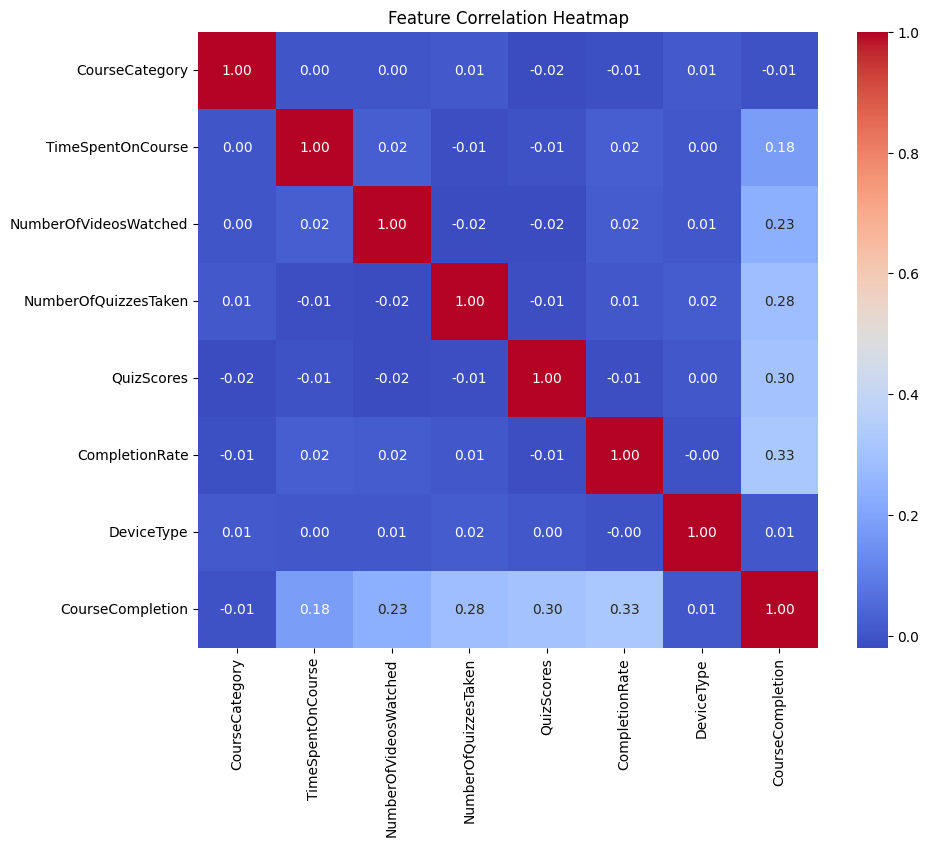

In [9]:
numeric_df = df.select_dtypes(include='number').drop(columns=['UserID'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()



# ✅**Preprocess data:**

In [10]:
# Drop UserID as it’s not useful for prediction
df.drop('UserID', axis=1, inplace=True)


**Feature Scaling**

In [11]:
scaler = StandardScaler()
features = df.drop('CourseCompletion', axis=1)
target = df['CourseCompletion']
X_scaled = scaler.fit_transform(features)

In [12]:
X_scaled

array([[-0.01304652, -0.70845858,  1.15685933, ..., -1.69293893,
        -1.018308  ,  0.99866755],
       [-1.43630377, -0.78487371, -1.49674135, ..., -0.84089635,
         0.52824188,  0.99866755],
       [-1.43630377,  1.2866426 ,  0.6593092 , ...,  0.26102679,
         0.46535938,  0.99866755],
       ...,
       [-0.01304652, -0.41948898, -1.16504126, ..., -0.36151627,
         0.68561124,  0.99866755],
       [-0.01304652,  0.6979546 ,  0.49345916, ...,  0.34422714,
         0.78188507,  0.99866755],
       [-0.01304652,  1.52424375, -0.50164109, ..., -1.2819596 ,
        -1.34859851, -1.00133422]])

**Split the data**

In [18]:

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, target, test_size=0.2, random_state=42
)

In [23]:
# Print shapes
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training features shape: (7200, 7)
Test features shape: (1800, 7)
Training target shape: (7200,)
Test target shape: (1800,)


**Train multiple models**

In [33]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf'),  # You can try 'linear' or 'poly' too
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



Model: Random Forest
Accuracy: 0.9567
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1068
           1       0.97      0.92      0.95       732

    accuracy                           0.96      1800
   macro avg       0.96      0.95      0.95      1800
weighted avg       0.96      0.96      0.96      1800


Model: XGBoost
Accuracy: 0.9528
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1068
           1       0.96      0.92      0.94       732

    accuracy                           0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.95      0.95      0.95      1800

[LightGBM] [Info] Number of positive: 2836, number of negative: 4364
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000786 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 808
[LightGBM]

In [25]:
models

{'Random Forest': RandomForestClassifier(),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=None, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=None,
               n_jobs=None, num_parallel_tree=None, random_state=None, ...),
 'LightGBM': LGBMClassifier()}

In [26]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\nModel: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


Model: Random Forest
Accuracy: 0.9567
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1068
           1       0.97      0.92      0.95       732

    accuracy                           0.96      1800
   macro avg       0.96      0.95      0.95      1800
weighted avg       0.96      0.96      0.96      1800


Model: XGBoost
Accuracy: 0.9528
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1068
           1       0.96      0.92      0.94       732

    accuracy                           0.95      1800
   macro avg       0.95      0.95      0.95      1800
weighted avg       0.95      0.95      0.95      1800

[LightGBM] [Info] Number of positive: 2836, number of negative: 4364
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 808
[LightGBM]

In [34]:
from sklearn.metrics import accuracy_score

print("Model Accuracies:\n" + "-"*30)
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name:<15}: Accuracy = {acc:.4f}")


Model Accuracies:
------------------------------
Random Forest  : Accuracy = 0.9561
XGBoost        : Accuracy = 0.9528
[LightGBM] [Info] Number of positive: 2836, number of negative: 4364
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.393889 -> initscore=-0.430994
[LightGBM] [Info] Start training from score -0.430994
LightGBM       : Accuracy = 0.9506
KNN            : Accuracy = 0.8494
SVM            : Accuracy = 0.8672
Logistic Regression: Accuracy = 0.7883


**Analysis**

In [35]:
best_model = models["Random Forest"]  # Update to use Random Forest instead of XGBoost
importances = best_model.feature_importances_
feature_names = features.columns

# Create DataFrame for feature importances
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})
feat_imp_df.sort_values(by="Importance", ascending=False, inplace=True)
feat_imp_df

,Feature,Importance
5,CompletionRate,0.231238
4,QuizScores,0.225378
3,NumberOfQuizzesTaken,0.190399
2,NumberOfVideosWatched,0.172354
1,TimeSpentOnCourse,0.159393
0,CourseCategory,0.014895
6,DeviceType,0.006343


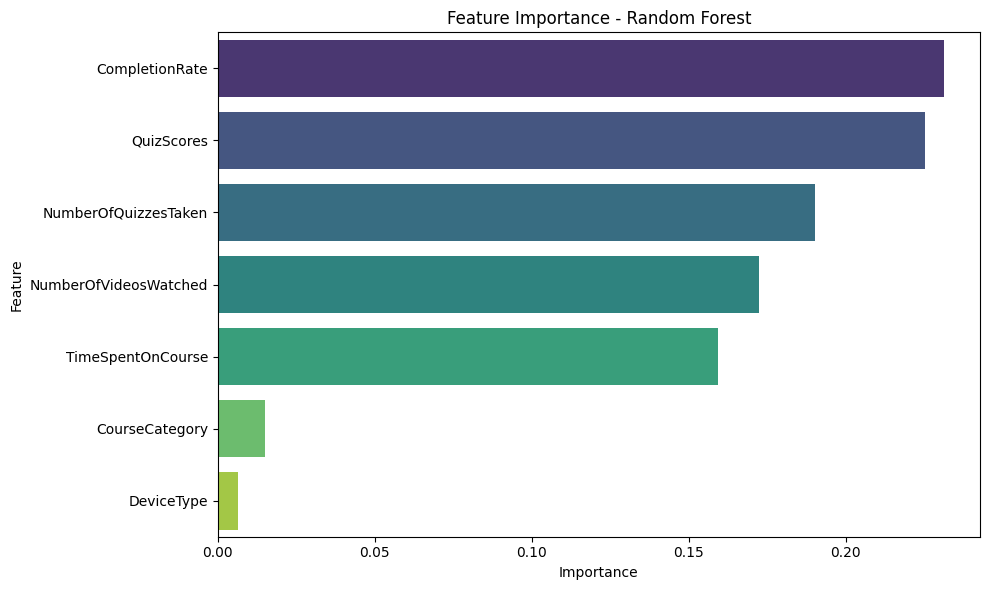

In [36]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp_df, palette="viridis")
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()

In [37]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on training and testing data
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Calculate accuracies
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Display results
print("Random Forest Accuracy:")
print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Random Forest Accuracy:
Training Accuracy: 1.0000
Test Accuracy: 0.9561

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1068
           1       0.97      0.92      0.94       732

    accuracy                           0.96      1800
   macro avg       0.96      0.95      0.95      1800
weighted avg       0.96      0.96      0.96      1800

